# Generate Synthetic Datasets

## Make_classification (sklearn.datasets): 

###1. Import libraries

In [ ]:
from sklearn.datasets import make_classification

import pandas as pd
import matplotlib.pyplot as plt

### 2. Define variable values and apply make_classification formula

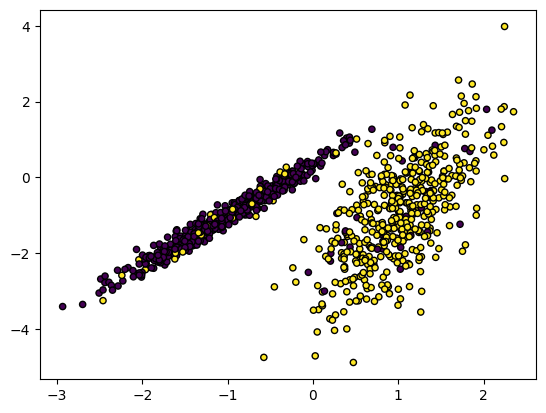

In [ ]:
nSamples=1000 #observations
nFeatures=2 #features e.g. Age and Balance to predict default
nRedundant=0 #number of redundant features. Linear combination.
nInformative=2 #relevant features. nFeatures>nInformative: the not informative features are generated as random linear combinations of the informative features 
nCluster=1 #number of clusters per class
flipY=0.15 #default=0.01. The fraction of samples whose class is assigned randomly
weightsI=[.50] #By default they are balanced
classSep=1 #Separation. Larger values spread out the clusters/classes and make the classification task easier
setSeed=4


X, y = make_classification(n_samples=nSamples, n_features=nFeatures, 
                           n_redundant=nRedundant, n_informative=nInformative, n_clusters_per_class=nCluster,
                           flip_y=flipY,random_state=setSeed, weights=weightsI,class_sep=classSep
)

plt.scatter(X[:,1], X[:,0], marker="o", c=y, s=20, edgecolor="k") #just to see how our data is by default

#Points are going to be normally distributed (sd=1)

## 3. Create dataframe and scaling

In [ ]:
df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1) #convert X,y to a pandas format
df2=df
df2.columns = ['balance', 'age', 'default_']

#Scaling 
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

#Age
min_target=18
max_target=65
X_std = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
df2['age'] =  round(X_std * (max_target - min_target) + min_target,1)

#Balance (in US$ thousands)
min_target=5
max_target=50
X_std = (df['balance'] - df['balance'].min()) / (df['balance'].max() - df['balance'].min())
df2['balance'] = round(X_std * (max_target - min_target) + min_target,1)


# 5 random rows
df2.sample(5)

,balance,age,default_
99,26.7,36.6,0
621,32.3,53.0,1
885,20.4,55.3,1
344,28.9,47.1,1
18,27.3,57.7,1


### 4. Plot customized results

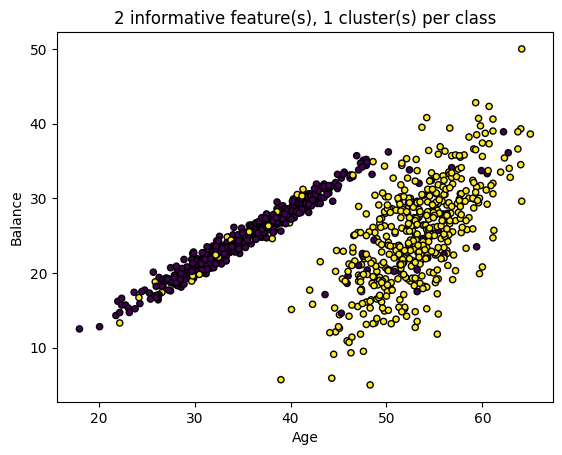

In [ ]:
plt.title(f"{nFeatures} informative feature(s), {nCluster} cluster(s) per class", fontsize=12)
plt.scatter(df2['age'], df2['balance'], marker="o", c=df2['default_'], s=20, edgecolor="k")
plt.xlabel('Age')
plt.ylabel('Balance')

plt.show()


In [ ]:
df2.to_csv('my_imbalanced_data.csv')